# We are going to write some boilerplate connection code using MEXC Futures

In [19]:
# when we trade from exchanges always need API Keys and a few other dependencies
import requests
import time
import hashlib
import hmac
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# get this from the exchange
API_KEY = 'mx0vglFgb6l5badaWV'
API_SECRET ='88ceac2620944d43942eb939ed5ddc40'


In [21]:
# Create API Signature

In [22]:
# MEXC Futures API base URL
BASE_URL = 'https://contract.mexc.com'

In [23]:
def create_signature(params, secret):
    """Generate an HMAC-SHA256 signature for the given parameters."""
    query_string = '&'.join(f"{k}={v}" for k, v in sorted(params.items()))
    return hmac.new(secret.encode(), query_string.encode(), hashlib.sha256).hexdigest()


In [6]:
def get_market_data(symbol='BTC_USDT'):
    """Fetch the market ticker data for the given symbol."""
    params = {
        'symbol': symbol,
        'api_key': API_KEY,
        'timestamp': str(int(time.time() * 1000))
    }
    params['sign'] = create_signature(params, API_SECRET)
    response = requests.get(f"{BASE_URL}/api/v1/contract/depth/{symbol}", params=params)
    return response.json()

if __name__ == '__main__':
    market_data = get_market_data()
    print(market_data)

{'success': True, 'code': 0, 'data': {'asks': [[96130.1, 17330, 1], [96130.2, 20802, 2], [96130.3, 21284, 1], [96130.4, 23398, 2], [96130.5, 20939, 1], [96130.6, 19347, 1], [96130.7, 21511, 1], [96130.8, 18395, 1], [96130.9, 16963, 1], [96131, 17133, 1], [96131.1, 18150, 1], [96131.2, 19247, 1], [96131.3, 16688, 1], [96131.4, 18856, 1], [96131.5, 16511, 1], [96131.6, 19213, 1], [96131.7, 19546, 1], [96131.8, 19444, 1], [96131.9, 15991, 1], [96132, 17424, 1], [96132.1, 17555, 1], [96132.2, 20751, 1], [96132.3, 17804, 1], [96132.4, 20347, 1], [96132.5, 16672, 1], [96132.6, 16560, 1], [96132.7, 21280, 1], [96132.8, 18634, 1], [96132.9, 20887, 1], [96133, 18165, 1], [96135, 637, 2], [96137, 8, 2], [96140, 1893, 2], [96144, 4356, 2], [96145, 150, 1], [96150, 12407, 5], [96155, 4, 1], [96158.8, 83, 1], [96160, 253, 2], [96161, 4, 1], [96165, 24, 3], [96170, 823, 4], [96171, 8, 2], [96175, 221, 3], [96179.1, 44, 1], [96180, 325, 9], [96181.5, 2, 1], [96182, 4, 1], [96185.5, 51, 1], [96186, 7,

In [10]:
# Extract Bids and offers from market data 
asks = market_data['data']['asks']
bids = market_data['data']['bids']

In [14]:
# Process asks:
# Sort asks by price (ascending) since lower ask prices come first.
asks_sorted = sorted(asks, key=lambda x: x[0])
ask_prices = [level[0] for level in asks_sorted]
ask_qty = [level[1] for level in asks_sorted]
# Compute cumulative quantity for asks.
cumulative_asks = np.cumsum(ask_qty)

In [15]:
# Do the same for the asks 
# Sort bids by price (descending) since higher bid prices come first.
bids_sorted = sorted(bids, key=lambda x: x[0], reverse=True)
bid_prices = [level[0] for level in bids_sorted]
bid_qty = [level[1] for level in bids_sorted]
# Compute cumulative quantity for bids.
cumulative_bids = np.cumsum(bid_qty)

## Lets now see if we can get the graph of the OB ##

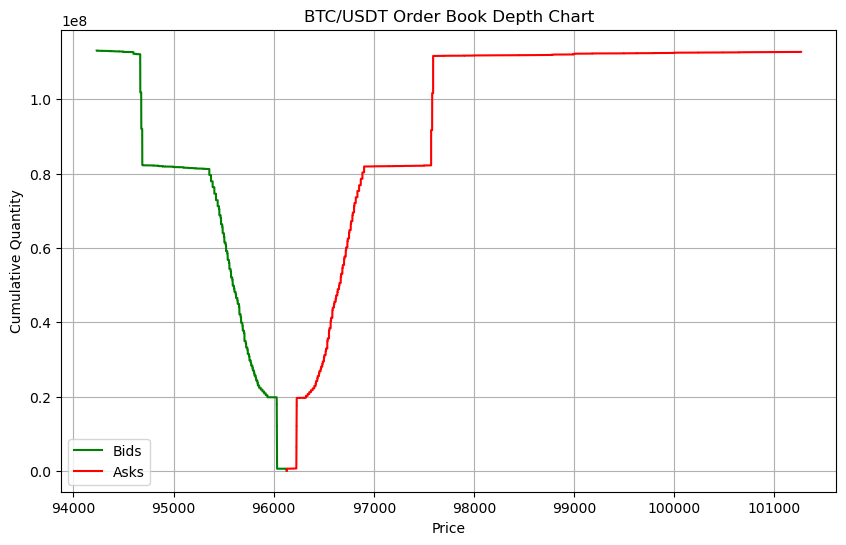

In [18]:

plt.figure(figsize=(10, 6))

#Using a step grid
plt.step(bid_prices, cumulative_bids, label='Bids', color='green', where='post')
plt.step(ask_prices, cumulative_asks, label='Asks', color='red', where='post')

plt.xlabel('Price')
plt.ylabel('Cumulative Quantity')
plt.title('BTC/USDT Order Book Depth Chart')
plt.legend()
plt.grid(True)
plt.show()